This is a starter notebook that includes visualization of data among other things. Using the scripts available for Bayesian hyper-parameter tuning, optimal setting of PCA and kernel PCA were found. For further details see those python 
`scripts`. 

**IMPORT LIBRARIES**

In [2]:
import numpy as np
import pandas as pd
import numpy as np
import pickle
from BayesianOpt import *
import seaborn as sns
from utils import *
import matplotlib.pyplot as plt
from PCA_LinearRegression import *
from KernelPCA_LinearRegression import *
from sklearn.decomposition import PCA, KernelPCA
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

pd.options.mode.chained_assignment = None  # default='warn'
pd.options.display.max_columns = 999
import warnings
warnings.filterwarnings('ignore')

$\large \text{Importing Data}$

In [3]:
# Loading Data
dataloader = DataLoader('./Data/train.csv', './Data/test.csv')
dataloader.Load_csv()

In [4]:
X_Train, Y_Train, X_Test = dataloader.Get_Data()

$\text{Let us look at the what the data looks like...}$

In [5]:
# Training Data
dataloader.df_Train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,X189,X190,X191,X192,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215,X216,X217,X218,X219,X220,X221,X222,X223,X224,X225,X226,X227,X228,X229,X230,X231,X232,X233,X234,X235,X236,X237,X238,X239,X240,X241,X242,X243,X244,X245,X246,X247,X248,X249,X250,X251,X252,X253,X254,X255,X256,X257,X258,X259,X260,X261,X262,X263,X264,X265,X266,X267,X268,X269,X270,X271,X272,X273,X274,X275,X276,X277,X278,X279,X280,X281,X282,X283,X284,X285,X286,X287,X288,X289,X290,X291,X292,X293,X294,X295,X296,X297,X298,X299,X300,X301,X302,X304,X305,X306,X307,X308,X309,X310,X311,X312,X313,X314,X315,X316,X317,X318,X319,X320,X321,X322,X323,X324,X325,X326,X327,X328,X329,X330,X331,X332,X333,X334,X335,X336,X337,X338,X339,X340,X341,X342,X343,X344,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0,1,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,

In [6]:
# Test Data
dataloader.df_Test.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,X189,X190,X191,X192,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215,X216,X217,X218,X219,X220,X221,X222,X223,X224,X225,X226,X227,X228,X229,X230,X231,X232,X233,X234,X235,X236,X237,X238,X239,X240,X241,X242,X243,X244,X245,X246,X247,X248,X249,X250,X251,X252,X253,X254,X255,X256,X257,X258,X259,X260,X261,X262,X263,X264,X265,X266,X267,X268,X269,X270,X271,X272,X273,X274,X275,X276,X277,X278,X279,X280,X281,X282,X283,X284,X285,X286,X287,X288,X289,X290,X291,X292,X293,X294,X295,X296,X297,X298,X299,X300,X301,X302,X304,X305,X306,X307,X308,X309,X310,X311,X312,X313,X314,X315,X316,X317,X318,X319,X320,X321,X322,X323,X324,X325,X326,X327,X328,X329,X330,X331,X332,X333,X334,X335,X336,X337,X338,X339,X340,X341,X342,X343,X344,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,1,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,0,0,1,0,0,1,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,

# DATA Pre-Processing

**Checking for Outliers in the output**

There is an outlier in Output values. We will remove this and set it to y_limit = 180.

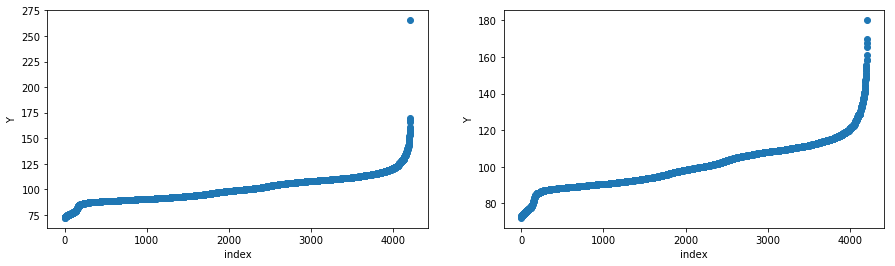

In [7]:
f,ax = plt.subplots(1,2, figsize=(15,4))
ax[0].set_xlabel('index', fontsize=10)
ax[0].set_ylabel('Y', fontsize = 10)
ax[0].scatter(range(Y_Train.shape[0]) , np.sort(Y_Train))

# REMOVING OUTLIERS FROM THE DATA
ylimit = [180]
dataloader.Set_UpperLimit(ylimit)
X_Train, Y_Train, X_Test = dataloader.Get_Data()

ax[1].set_xlabel('index', fontsize=10)
ax[1].set_ylabel('Y', fontsize = 10)
ax[1].scatter(range(Y_Train.shape[0]) , np.sort(Y_Train))
plt.show()

$\large \text{Analyzing Distribution of } Y $

Here we are going to manipulate the distribution of distribution of Y by simple transform so that it is easier for a machine learning model to regress them.

In [8]:
scaler = StandardScaler()
# Y_Train_Transformed = np.log(Y_Train)/np.log(1e-10)
scaler.fit(Y_Train[:,np.newaxis])
Y_Train_Transformed = scaler.transform(Y_Train[:,np.newaxis])[:,0]

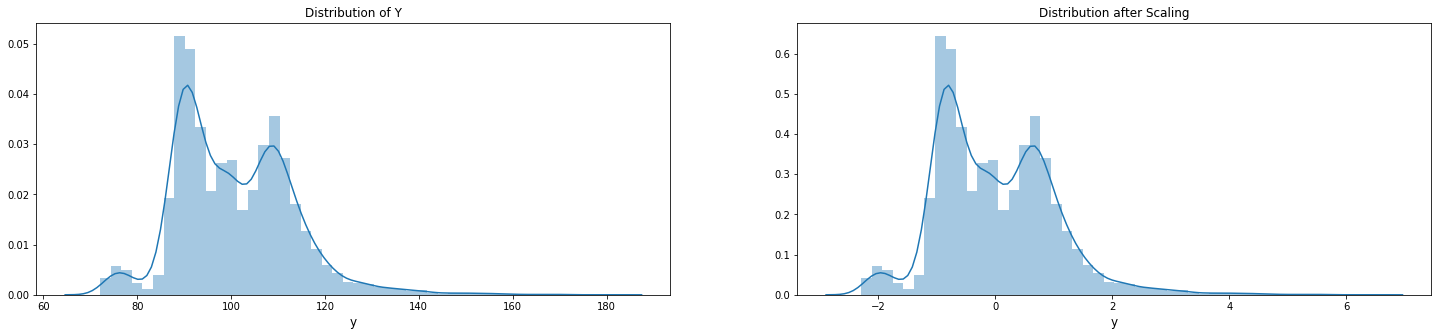

In [9]:
plt.figure(figsize=(25,5))
plt.subplot(1,2,1); plt.title('Distribution of Y')
sns.distplot(Y_Train, kde=True)
plt.xlabel('y', fontsize=12)

plt.subplot(1,2,2); plt.title('Distribution after Scaling')
sns.distplot(Y_Train_Transformed, kde=True)
plt.xlabel('y', fontsize=12)
plt.show()

$\large \text{Analyzing Training Data}$

Two types of Columns are present: int64 and object
1. 368 Numeric Features
2. 8 Categorical Features

In [10]:
dtype_X = X_Train.dtypes.reset_index()
dtype_X.columns = ["Count", "Column Type"]
dtype_X.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,368
1,object,8


The Columns of categorical features are:

In [11]:
dtype_X[:10]

,Count,Column Type
0,X0,object
1,X1,object
2,X2,object
3,X3,object
4,X4,object
5,X5,object
6,X6,object
7,X8,object
8,X10,int64
9,X11,int64


**Checking the integer columns for unique values**

All columns either contain 1 or 0. Some columns in Training Set only contain zeros

In [12]:
unique_values_dict = {}
for col in X_Train.columns:
    if col not in ["ID", "X0", "X1", "X2", "X3", "X4", "X5", "X6", "X8"]:
        unique_value = str(np.sort(X_Train[col].unique()).tolist())
        tlist = unique_values_dict.get(unique_value, [])
        tlist.append(col)
        unique_values_dict[unique_value] = tlist[:]
for unique_val, columns in unique_values_dict.items():
    print("Columns containing the unique values : ",unique_val)
    print(columns)
    print("--------------------------------------------------")

Columns containing the unique values :  [0, 1]
['X10', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X94', 'X95', 'X96', 'X97', 'X98', 'X99', 'X100', 'X101', 'X102', 'X103', 'X104', 'X105', 'X106', 'X108', 'X109', 'X110', 'X111', 'X112', 'X113', 'X114', 'X115', 'X116', 'X117', 'X118', 'X119', 'X120', 'X122', 'X123', 'X124', 'X125', 'X126', 'X127', 'X128', 'X129', 'X130', 'X131', 'X132', 'X133', 'X134', 'X135', 'X136', 'X137', 'X138', 'X139', 'X140', 'X141', 'X142', 'X143', 'X144', 'X145'

$\text{We will choose not to remove these features for now}$

# DISTRIBUTION OF CATEGORICAL FEATUERS WITH Y

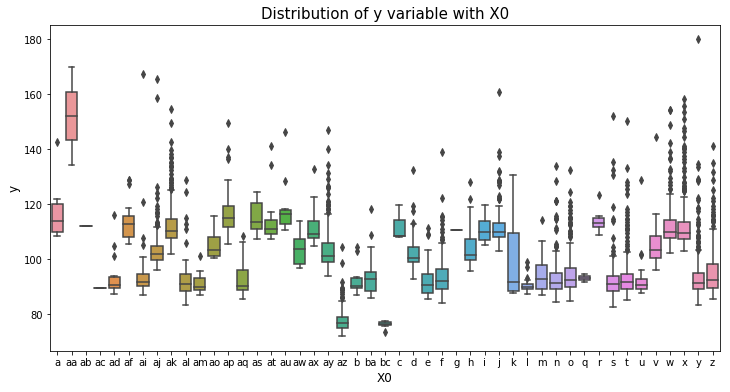

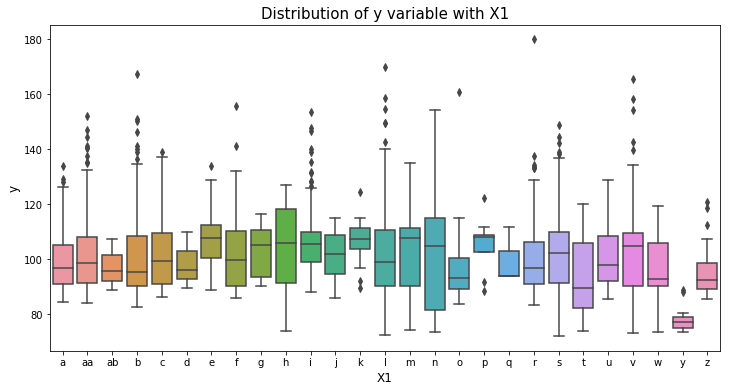

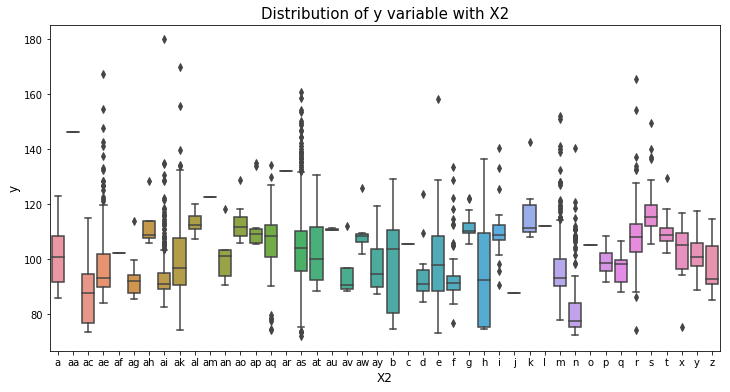

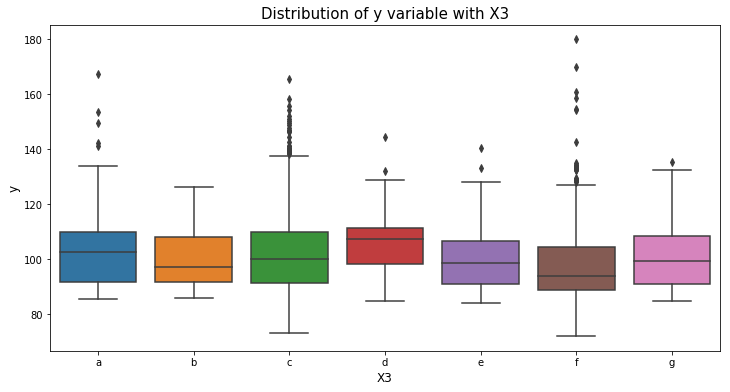

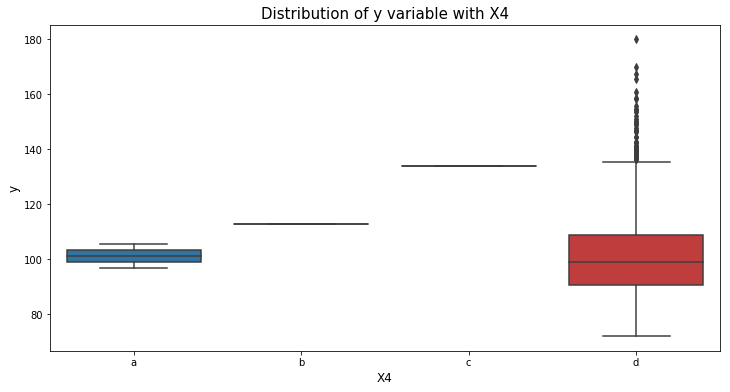

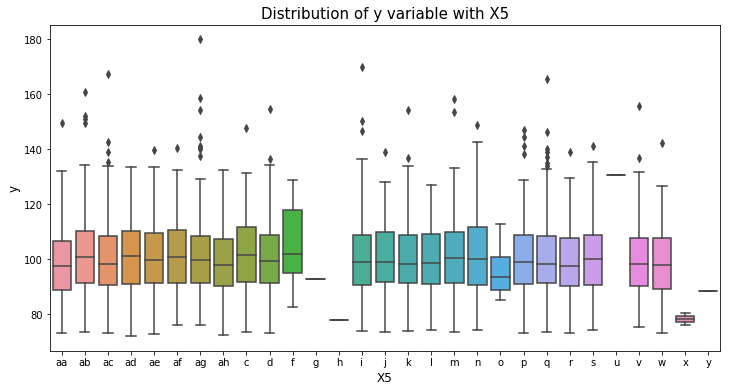

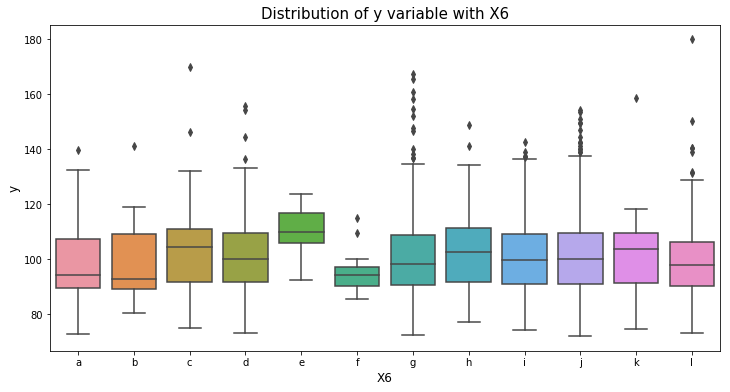

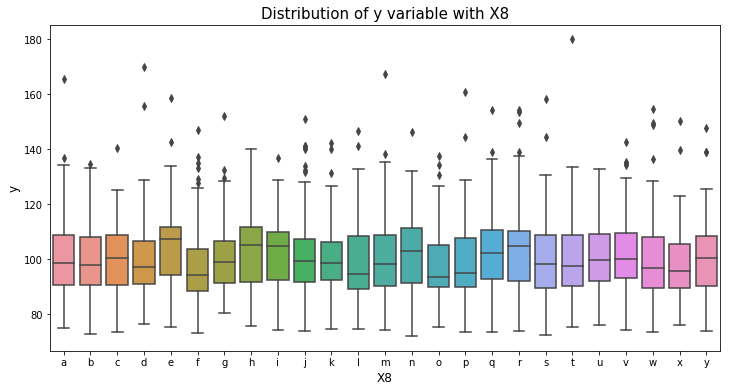

In [13]:
Columns = dataloader.df_Train[['X0','X1','X2','X3','X4','X5','X6', 'X8']].columns
for var_name in Columns:
    # var_name = "X0"
    col_order = np.sort(X_Train[var_name].unique()).tolist()
    plt.figure(figsize=(12,6))
    sns.boxplot(x=var_name, y=Y_Train, data=X_Train, order=col_order)
    plt.xlabel(var_name, fontsize=12)
    plt.ylabel('y', fontsize=12)
    plt.title("Distribution of y variable with "+var_name, fontsize=15)
    plt.show()

$\large \text{ ENCODING CATOGORICAL VARIABLES}$

Using One Hot Encoding and converting all numeric data types in int64. Combining Test and Training data only for now so that when encoding catogorical we do not miss some levels that are only in Test Data.

In [14]:
X_concat = pd.concat([ X_Train , X_Test])
X_concat_Numeric = pd.get_dummies(X_concat, columns=['X0','X1','X2','X3','X4','X5','X6','X8'])
X_concat_Numeric = X_concat_Numeric.astype('int64')

# Converting to a Numpy Array
X_concat_Numeric =  np.array(X_concat_Numeric)

X_Train = X_concat_Numeric[:4209,:]
X_Test  =  X_concat_Numeric[4209:,:]

print('The shape of Training Matrix = ', X_Train.shape)
print('The shape of Test Matrix = ', X_Test.shape)
print('The shape of Output vector = ', Y_Train.shape)

The shape of Training Matrix =  (4209, 579)
The shape of Test Matrix =  (4209, 579)
The shape of Output vector =  (4209,)


$\large \text{Train/Validation Split }$ 

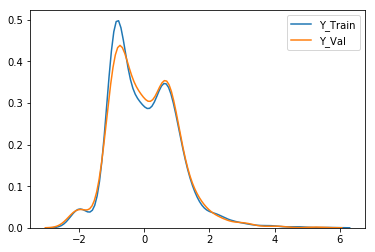

In [16]:
train_val_split = 0.3 # ratio is the percentage of validation data
X_Train, X_Val, Y_Train, Y_Val = Train_Test_Split(X_Train, Y_Train,train_val_split )

# STANDARDIZING RESPONSE VALUES
scalerY = StandardScaler(copy=True, with_mean=True, with_std=True)
scalerY.fit(Y_Train[:,np.newaxis]); 
Y_Train = scalerY.transform(Y_Train[:,np.newaxis])[:,0] 
Y_Val = scalerY.transform(Y_Val[:,np.newaxis])[:,0]

# STANDARDIZING TRAINING DATA
scalerX = StandardScaler(copy=True, with_mean=True, with_std=True)
scalerX.fit(X_Train)
X_Train = scalerX.transform(X_Train)
X_Val = scalerX.transform(X_Val)

sns.distplot(Y_Train, hist=False, label='Y_Train')
sns.distplot(Y_Val, hist=False, label='Y_Val')
plt.legend()
plt.show()

# Dimensionality Reduction

# ** PCA **

Using PCA to reduce the dimensionality. Most of the information is retained in top 200 components i.e 98%.
Dimensions reduced from 579 to 200.

In [27]:
# loading optimal parameters for pipeline containing PCA and linear regression. 
LinearRegressionPCA = ReadPickle('./BayesianOptimizationResults/LinearReg_PCA_BayesianOptimization.pickle')

print('The optimal value of principal components = ' + str(LinearRegressionPCA.OptimalParameters()))

The optimal value of principal components = [102]


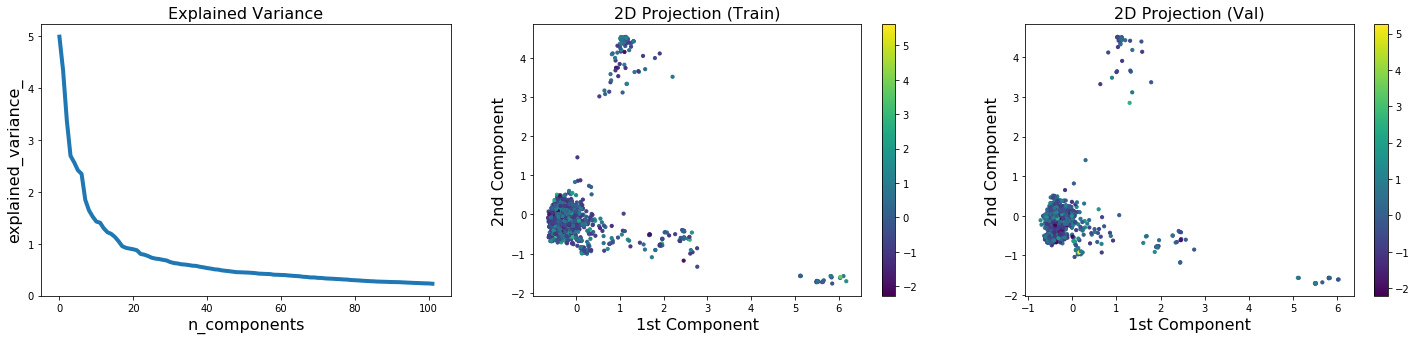

Choosing 102 components ... Total Variance captured  0.7451953376559478


In [29]:
NoOfComponents = 102
# Doing PCA
pca = PCA(n_components = NoOfComponents, whiten=True).fit(X_Train)
X_PCA = pca.transform(X_Train)
X_Val_PCA = pca.transform(X_Val)

# Visualizing Results
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
plt.plot(range(NoOfComponents), pca.explained_variance_ratio_*100, linewidth=4)
plt.xlabel('n_components', size = 16) 
plt.ylabel('explained_variance_', size = 16)
plt.title('Explained Variance', size = 16)

plt.subplot(1,3,2)
plt.scatter(X_PCA[:,0],X_PCA[:,1], s=10, c= Y_Train); plt.colorbar()
plt.xlabel('1st Component' ,size=16) 
plt.ylabel('2nd Component' ,size=16)
plt.title('2D Projection (Train)', size=16)

plt.subplot(1,3,3)
plt.scatter(X_Val_PCA[:,0],X_Val_PCA[:,1], s=10, c= Y_Val); plt.colorbar()
plt.xlabel('1st Component' ,size=16) 
plt.ylabel('2nd Component' ,size=16)
plt.title('2D Projection (Val)', size=16)


plt.show()
print('Choosing', NoOfComponents, 'components ... Total Variance captured ', np.sum(pca.explained_variance_ratio_))

#  Kernel PCA

In [34]:
LinearRegressionKernelPCA = ReadPickle('./BayesianOptimizationResults/LinearReg_KernelPCA_BayesianOptimization.pickle')
param = LinearRegressionKernelPCA.OptimalParameters()
print('The optimal number of principal components = ' + str(param[0]))

The optimal number of principal components = 79


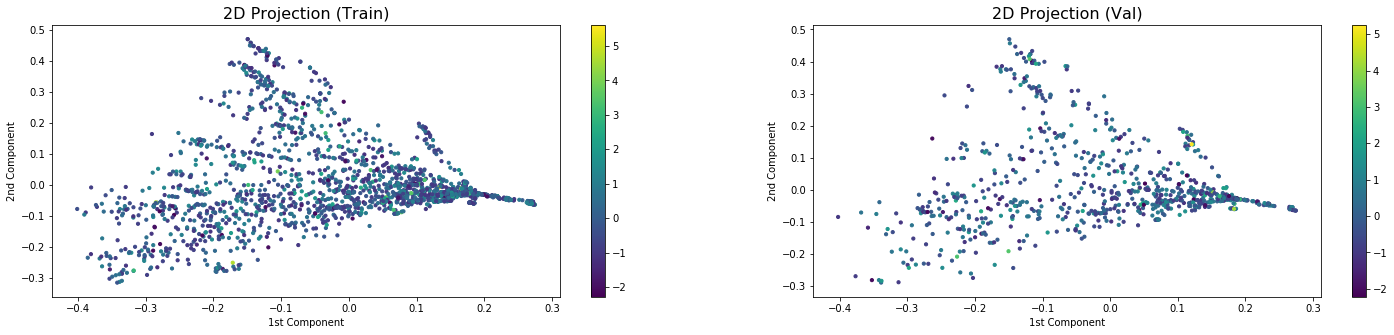

In [36]:
NoOfComponents, gamma = param

# Applying Kernel PCA. After grid search gamma= 0.0001
kpca = KernelPCA(n_components = NoOfComponents, kernel="rbf", gamma=gamma, alpha=1, degree =1).fit(X_Train)
X_KPCA = kpca.transform(X_Train)
X_Val_KPCA = kpca.transform(X_Val)

# Visualizing Results
plt.figure(figsize=(25,5))
plt.subplot(1,2,1)
plt.scatter(X_KPCA[:,0],X_KPCA[:,1], s=10, c= Y_Train); plt.colorbar()
plt.xlabel('1st Component') 
plt.ylabel('2nd Component')
plt.title('2D Projection (Train)', size=16)

plt.subplot(1,2,2)
plt.scatter(X_Val_KPCA[:,0],X_Val_KPCA[:,1], s=10, c= Y_Val); plt.colorbar()
plt.xlabel('1st Component') 
plt.ylabel('2nd Component')
plt.title('2D Projection (Val)', size=16)
plt.show()